# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
# 필요한 라이브러리들 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family = "Malgun Gothic") # 그래프에서 한글 깨지는 현상 방지

In [2]:
data = pd.read_csv("2wk_Regression_assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

일단 먼저 target 함수인 Class에 대해서 수치형 변수를 카테고리형 변수로 바꿔준다.

In [5]:
data["Class"] = data["Class"].astype("category")

In [6]:
data["Class"] # target 변수 확인하기

0        0
1        0
2        0
3        0
4        0
        ..
28673    0
28674    0
28675    0
28676    0
28677    0
Name: Class, Length: 28678, dtype: category
Categories (2, int64): [0, 1]

In [7]:
# 데이터 나누기
features = data.iloc[:,:-1] 
target = data["Class"] 

In [8]:
features.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


전체적으로 feature들의 통계량을 살펴봤을 때, 각 변수 별로 데이터 분포나 범위가 상이하고 또한 이상치도 많이 보이기 때문에 뒤에서 회귀모델에 조금 더 적합한 MinMaxScaler를 이용하여 Scaling을 진행할 예정이다.

In [9]:
target.value_counts() # y 값 데이터 수 파악

Class
0    28432
1      246
Name: count, dtype: int64

약 115:1 비율로 굉장히 불균형적인 데이터 형태로 볼 수 있다. 따라서 0으로만 계속 예측을 진행했을 때에도 `정확도(Accuracy)`는 높게 측정될 수 있다. 또한 우리는 신용카드 사기를 검출에 대해서 보는 것이기 때문에 평가지표 중 `정확도(Accuracy)`를 가지고 판단하기에는 어려움이 있을 것 같고, `재현율(Recall)` 혹은 `F1 score`를 가지고 판단할 예정이다.

#### train data // test data 나누기

In [10]:
#로지스틱 회귀 import
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# train, test 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42, stratify = target)
# stratify를 이용하여 train data 와 test data에 균일하게 class를 분포하고자 한다.

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22942, 28) (5736, 28) (22942,) (5736,)


데이터가 잘 나눠졌음을 확인할 수 있다.

#### 앞서 X 변수들의 통계량을 다시 한 번 살펴봤을 때, 스케일링이 필요함을 확인했으므로 MinMaxSCaler를 적용시켜서 졍규화를 진행하고자 한다.

In [12]:
features.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = features.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = features.columns)

In [14]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,...,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000
mean,0.926541,0.639517,0.882866,0.320483,0.561021,0.493161,0.530282,0.662537,0.622577,0.614722,...,0.457297,0.474950,0.441076,0.514945,0.791743,0.407366,0.727433,0.417707,0.399902,0.391835
std,0.062362,0.027395,0.050275,0.084667,0.020138,0.030504,0.018796,0.023300,0.052581,0.031697,...,0.085944,0.016195,0.017085,0.042762,0.012978,0.090524,0.056167,0.089889,0.021823,0.012261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.899391,0.628892,0.858895,0.270149,0.552030,0.476010,0.523594,0.658961,0.592634,0.601957,...,0.409075,0.470209,0.436257,0.483774,0.788415,0.354539,0.692969,0.356775,0.395999,0.389663
50%,0.927690,0.639934,0.889353,0.317587,0.560789,0.487051,0.531404,0.662801,0.620845,0.613223,...,0.457009,0.473505,0.440295,0.515304,0.791641,0.413554,0.729692,0.407690,0.399940,0.392247
75%,0.967217,0.652287,0.913567,0.362298,0.569751,0.502185,0.538133,0.668009,0.651235,0.627343,...,0.505209,0.477776,0.444684,0.545424,0.795040,0.472585,0.765856,0.462544,0.404784,0.395029
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,...,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000
mean,0.918028,0.719928,0.882839,0.273614,0.557526,0.598071,0.663657,0.795093,0.607623,0.697335,...,0.556424,0.310243,0.286869,0.650453,0.681945,0.421339,0.646583,0.341459,0.606529,0.287662
std,0.067122,0.026758,0.050277,0.091344,0.043181,0.081175,0.029728,0.027558,0.073228,0.038986,...,0.099799,0.017953,0.023817,0.054560,0.024052,0.097677,0.073552,0.106209,0.030401,0.020476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.885770,0.709279,0.856729,0.219510,0.535580,0.549810,0.653136,0.790618,0.566744,0.681802,...,0.499500,0.304790,0.280519,0.610908,0.675028,0.361388,0.602614,0.270937,0.600877,0.283568
50%,0.918946,0.720087,0.889299,0.271963,0.555683,0.581719,0.665477,0.795514,0.605417,0.696008,...,0.555218,0.308493,0.285696,0.651480,0.681370,0.427909,0.650225,0.328326,0.606746,0.288183
75%,0.963184,0.732411,0.913896,0.319302,0.576642,0.623575,0.676420,0.801894,0.649352,0.713267,...,0.611677,0.313730,0.291278,0.688997,0.688210,0.494296,0.696832,0.394754,0.614130,0.293040
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Scaling이 잘 이뤄진 것을 볼 수 있기 때문에 다음부터 로지스틱 회귀분석을 진행하고자 한다.

#### 로지스틱 회귀분석 진행

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # 로지스틱 회귀분석을 통한 모델 생성
model.fit(X_train, y_train) # 학습

y_pred = model.predict(X_test) # 에측값 설정

In [17]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
pred_proba = model.predict_proba(X_test)[:, -1].reshape(-1,1)
# AUC를 구하기 위해서 확률 따로 설정

#### 성능 평가 지표 (Confusion Matrix)

In [19]:
from sklearn.metrics import *

In [20]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5706
           1       0.61      1.00      0.76        30

    accuracy                           1.00      5736
   macro avg       0.81      1.00      0.88      5736
weighted avg       1.00      1.00      1.00      5736



위 자료를 살펴봤을 때 모델 성능이 굉장히 좋은 것으로 확인할 수 있다.

In [21]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

* Accuracy : 예측한 값과 실제 값이 같은 경우

In [22]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)

0.9966875871687587


사기를 사기라고 맞게 분류한 경우 + 사기 X를 사기 X라고 맞게 분류한 경우

* Precision(정밀도) : Positive(True) 라고 예측한 것 중에서 실제 값도 True인 경우

In [23]:
precision = TP / (TP + FP)
print(precision)

1.0


잘못 예측한 값은 하나도 없다.

* Recall(재현율) : 실제로 True인 것들 중에서 모델이 Positive(True)라고 잘 예측한 경우

In [24]:
recall = TP / (TP + FN)
print(recall)

0.6122448979591837


재현율은 다른 지표들에 비해 다소 낮은 것을 확인할 수 있다.

* F1 Score : Precison(정밀도)과 Recall의 조화 평균

In [25]:
f1_score = (2*(precision*recall))/(precision + recall)
print(f1_score)

0.759493670886076


* Specificity(특이도) : 실제 사기 x 인 사람 중에서 올바르게 분류된 비율 (negative로 판단한 것 중에서 실제 negative인 비율)

In [26]:
specificity = TN / (TN + FP)
print(specificity)

1.0


#### ROC 커브 

auc : 0.9768214653542092


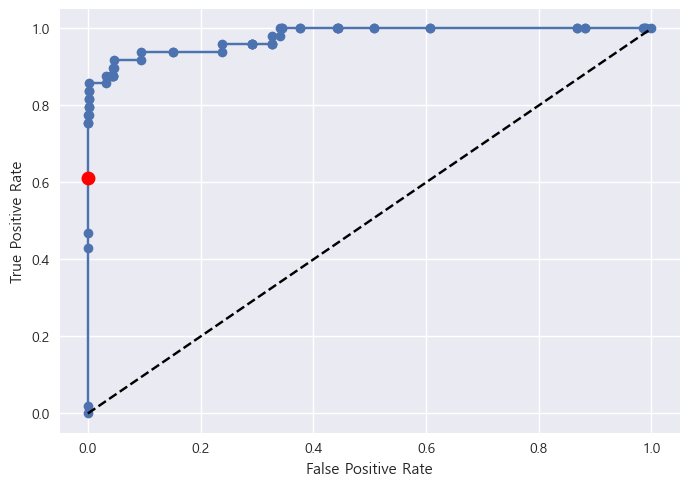

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
# 진짜 양성 비율, 거짓 양성 비율, 임계값 계산

# ROC 커브 생성
plt.plot(fpr, tpr, 'o-', label = "LogisticRegression") # 점과 선으로 그래프 그리기
plt.plot([0,1],[0,1], "k--") # 대각선으로 서로를 잇는 직선
plt.plot([1-specificity],[recall],'ro', ms= 10) # 임의의 특정 지점 cut-off value
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

#AUC 값
from sklearn.metrics import auc
auc = auc(fpr, tpr)

print("auc :", auc)

auc 값은 0.97 정도로 높은 편이지만, cut-off value(경계값) 값이 optimal 하다고 보기엔 힘들다.

또한 이 데이터는 0이 굉장히 많은 불균형한 데이터이다. 이는 사기라고 예측되는 일이 많지 않기 때문에 cut off 자체를 낮게 잡아서 예측을 하면, 조금 더 optimal한 값을 얻을 수 있다.

#### 성능 향상 - Find Optimal Cut Off Value

대부분 통상적으로 최적의 cut off 값을 
민감도(sensitivity) + 특이도(Specificity) - 1 = k(가장 큰)로 설정한다.

In [28]:
optimal_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_index]

optimal_pred = model.decision_function(X_test) > optimal_threshold

#### 성능 향상에 대한 새로운 평가 지표 (Confusion Matrix)

In [29]:
TN, FP, FN, TP = confusion_matrix(y_test, optimal_pred).ravel()

* Accuracy(정확도) : 예측이 실제와 잘 맞은 비율

In [30]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)

0.953626220362622


* Precision(정밀도) : Positive(True) 라고 예측한 것 중에서 실제 값도 True인 경우

In [31]:
precision = TP / (TP + FP)
print(precision)

0.14426229508196722


* Recall(재현율) : 실제로 True인 것들 중에서 모델이 Positive(True)라고 잘 예측한 경우

In [32]:
recall = TP / (TP + FN)
print(recall)

0.8979591836734694


* F1 Score : Precison(정밀도)과 Recall의 조화 평균


In [33]:
f1_score = (2*(precision*recall))/(precision + recall)
print(f1_score)

0.24858757062146894


* Specificity(특이도) : 실제 사기 x 인 사람 중에서 올바르게 분류된 비율 (negative로 판단한 것 중에서 실제 negative인 비율)

In [34]:
specificity = TN / (TN + FP)
print(specificity)

0.9541058554598206


#### ROC 커브

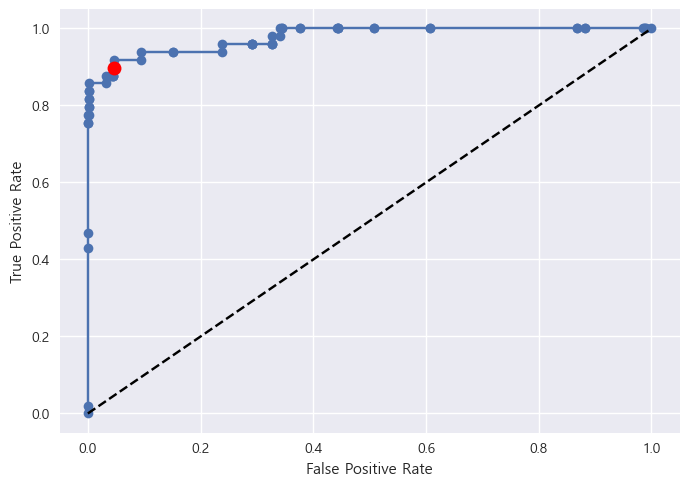

0.9768214653542092


In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label = "LogisticRegression") # 점과 선으로 그래프 그리기
plt.plot([0,1],[0,1], "k--") # 대각선으로 서로를 잇는 직선
plt.plot([1-specificity],[recall],'ro', ms= 10) # 임의의 특정 지점 cut-off value
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print(auc)

#### 성능 향상 전/후에 대한 분석

- ROC 커브 그래프를 살펴봤을 때 개선 전 후 cut off가 더 optimal하게 향상된 것을 확인할 수 있다.

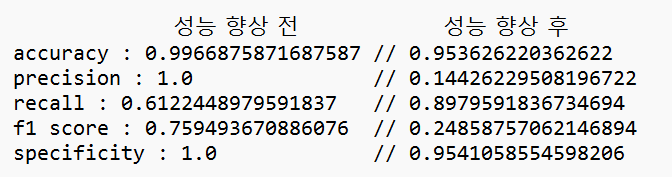

평가 지표들을 살펴보면, 오히려 대부분의 성능이 떨어진 것 같다.

* accuracy and specificity <br>
정확도와 특이도는 살짝 떨어졌지만, 그럼에도 높은 수치를 보이고 있다.

* precision and f1 score <br>
정밀도와 f1 score는 정말 큰 폭으로 성능이 하락된 것을 확인할 수 있다.

* recall <br>
재현율은 전과 대비 나름 큰 폭으로 성능이 향상된 것을 확인할 수 있다.

대부분의 데이터 형태로 봤을 때는 `정확도`, `정밀도`, `재현율` 등 모두 다 중요한 지표이다. 그러나 분석을 진행한 본 데이터 셋은 `카드 사기` 이기 때문에 정상 거래를 사기라고 예측한 것보다 사기 거래를 사기라고 예측하지 못한( 정상 거래라고 생각) 것이 더 큰 손실이 있을 것이다.

`따라서 본 카드 사기 데이터는 정밀도 보다 재현율이 조금 더 중요한 지표라고 볼 수 있기 때문에 재현율 측면에서 성능 향상은 큰 폭으로 개선되었기 때문에 성능 향상이 잘 이루어졌다고 볼 수 있다.`